In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 156s 3ms/step - loss: 0.2588 - acc: 0.9201 - val_loss: 0.0568 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0877 - acc: 0.9737 - val_loss: 0.0447 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0662 - acc: 0.9799 - val_loss: 0.0380 - val_acc: 0.9871
Epoch 4/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0552 - acc: 0.9834 - val_loss: 0.0334 - val_acc: 0.9891
Epoch 5/12
60000/60000 [============

Using the Errorplot code from the Keras assignment

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
%matplotlib inline

<h3> Model 1 : 2 conv + 2 maxpool + dropout + 2 dense layer + adam optimizer </h3>

In [5]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 8)         296       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 84)                24276     
_________________________________________________________________
dropout_3 (Dropout)          (None, 84)               

In [6]:
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 377us/step - loss: 0.6148 - acc: 0.8085 - val_loss: 0.1444 - val_acc: 0.9584
Epoch 2/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.2220 - acc: 0.9327 - val_loss: 0.0969 - val_acc: 0.9709
Epoch 3/12
60000/60000 [==============================] - 22s 366us/step - loss: 0.1722 - acc: 0.9489 - val_loss: 0.0770 - val_acc: 0.9770
Epoch 4/12
60000/60000 [==============================] - 22s 367us/step - loss: 0.1511 - acc: 0.9554 - val_loss: 0.0674 - val_acc: 0.9784
Epoch 5/12
60000/60000 [==============================] - 22s 366us/step - loss: 0.1342 - acc: 0.9598 - val_loss: 0.0601 - val_acc: 0.9806
Epoch 6/12
60000/60000 [==============================] - 22s 365us/step - loss: 0.1228 - acc: 0.9632 - val_loss: 0.0562 - val_acc: 0.9813
Epoch 7/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.1156 - acc: 0.9656 - val_loss: 0.

Test score: 0.041687695559760325
Test accuracy: 0.9866


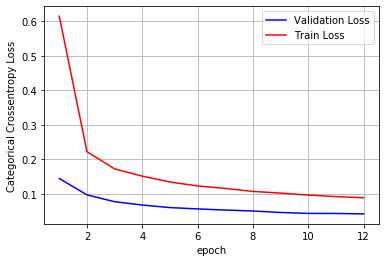

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> Model 2 : 3 conv + 2 maxpool + BN + dropout + 3 dense layer + adam optimizer </h3>

In [12]:
from keras.layers.normalization import BatchNormalization
model_1 = Sequential()
model_1.add(Conv2D(4, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model_1.add(Conv2D(8, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model_1.add(Conv2D(12, (3, 3), activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(84, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(120, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))
model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 8)         296       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 12)          876       
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [17]:
history=model_1.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 392us/step - loss: 0.0519 - acc: 0.9840 - val_loss: 0.0415 - val_acc: 0.9861
Epoch 2/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0483 - acc: 0.9849 - val_loss: 0.0525 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 23s 375us/step - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0393 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.0463 - acc: 0.9856 - val_loss: 0.0422 - val_acc: 0.9864
Epoch 5/12
60000/60000 [==============================] - 23s 379us/step - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0392 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 22s 370us/step - loss: 0.0445 - acc: 0.9863 - val_loss: 0.0366 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 23s 379us/step - loss: 0.0429 - acc: 0.9863 - val_loss: 0.

Test score: 0.04166760154593212
Test accuracy: 0.9879


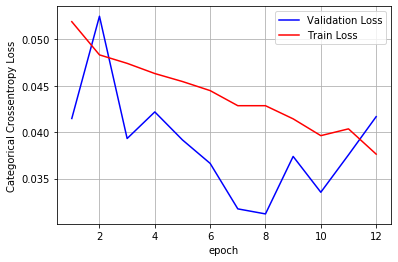

In [18]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> Model 3 : 5 conv + 3 maxpool + 2 BN + 2 dropout + 3 dense layer + adam optimizer </h3>

In [29]:
model_2 = Sequential()
model_2.add(Conv2D(4, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model_2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model_2.add(Conv2D(12, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model_2.add(Conv2D(48, (3, 3), activation='relu', padding='same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Conv2D(120, (3, 3), activation='relu', padding='same'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 12)          876       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 12)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 3, 48)         

In [30]:
history=model_2.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 40s 668us/step - loss: 0.4384 - acc: 0.8562 - val_loss: 0.1255 - val_acc: 0.9594
Epoch 2/12
60000/60000 [==============================] - 38s 636us/step - loss: 0.1624 - acc: 0.9484 - val_loss: 0.1015 - val_acc: 0.9688
Epoch 3/12
60000/60000 [==============================] - 38s 640us/step - loss: 0.1184 - acc: 0.9618 - val_loss: 0.0709 - val_acc: 0.9783
Epoch 4/12
60000/60000 [==============================] - 38s 628us/step - loss: 0.1005 - acc: 0.9685 - val_loss: 0.0641 - val_acc: 0.9808
Epoch 5/12
60000/60000 [==============================] - 37s 623us/step - loss: 0.0869 - acc: 0.9728 - val_loss: 0.0617 - val_acc: 0.9805
Epoch 6/12
60000/60000 [==============================] - 38s 632us/step - loss: 0.0783 - acc: 0.9748 - val_loss: 0.0545 - val_acc: 0.9838
Epoch 7/12
60000/60000 [==============================] - 38s 633us/step - loss: 0.0714 - acc: 0.9773 - val_loss: 0.

Test score: 0.04472449148670421
Test accuracy: 0.9878


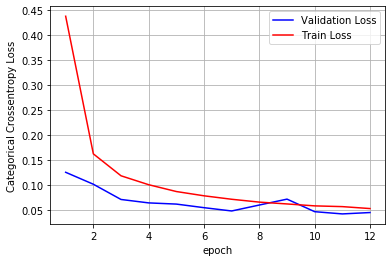

In [31]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score_2[0]) 
print('Test accuracy:', score_2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)